In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Perform below visualization

Alive  213
Dead  464
Survival Rate:  0.31 :1


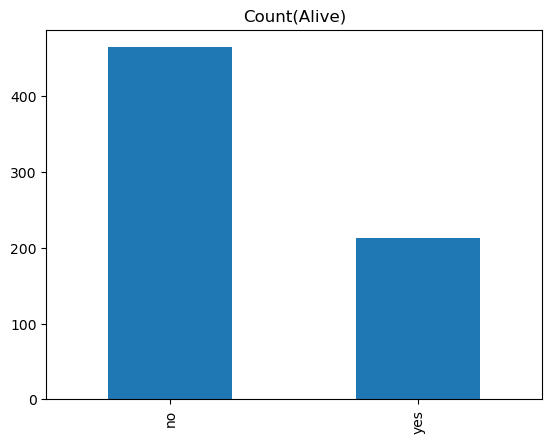

In [46]:
targ_cnt=df.alive.value_counts()
print('Alive ',targ_cnt[1])
print('Dead ',targ_cnt[0])
print('Survival Rate: ',round(targ_cnt[1]/(targ_cnt[0]+targ_cnt[1]),2),':1')
targ_cnt.plot(kind='bar',title='Count(Alive)')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

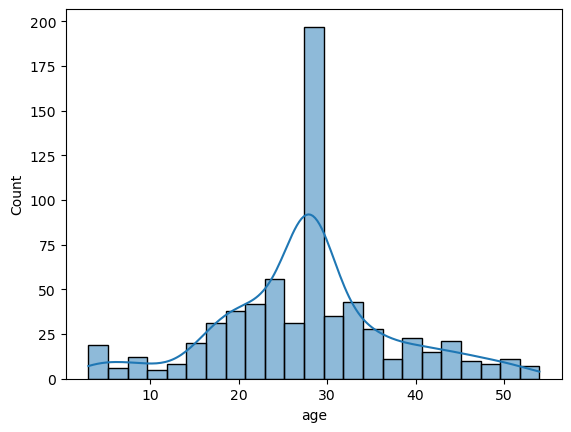

In [47]:
sns.histplot(df.age,kde=True)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

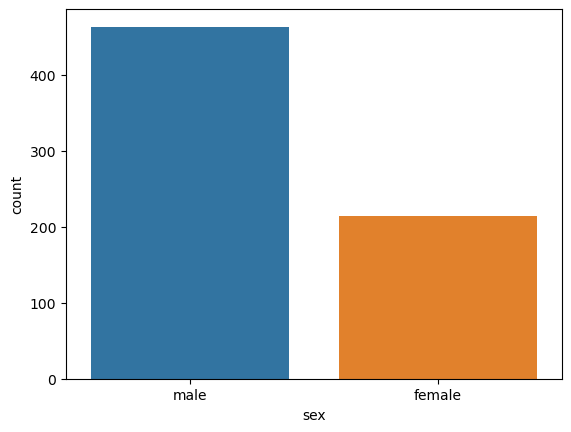

In [48]:
sns.countplot(df.sex)

In [49]:
df[['age', 'fare', 'pclass', 'survived', 'parch','sibsp']].corr()

,age,fare,pclass,survived,parch,sibsp
age,1.000000,-0.029439,-0.261202,-0.091401,-0.128668,-0.325830
fare,-0.029439,1.000000,-0.503891,0.187170,0.495266,0.486767
pclass,-0.261202,-0.503891,1.000000,-0.241777,0.068389,0.138263
survived,-0.091401,0.187170,-0.241777,1.000000,0.077268,-0.014252
parch,-0.128668,0.495266,0.068389,0.077268,1.000000,0.407087
sibsp,-0.325830,0.486767,0.138263,-0.014252,0.407087,1.000000


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 300.0)

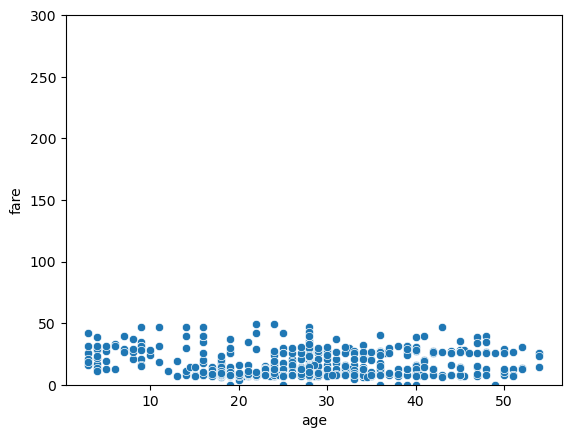

In [50]:
sns.scatterplot(df.age, df.fare)

plt.ylim(0,300)

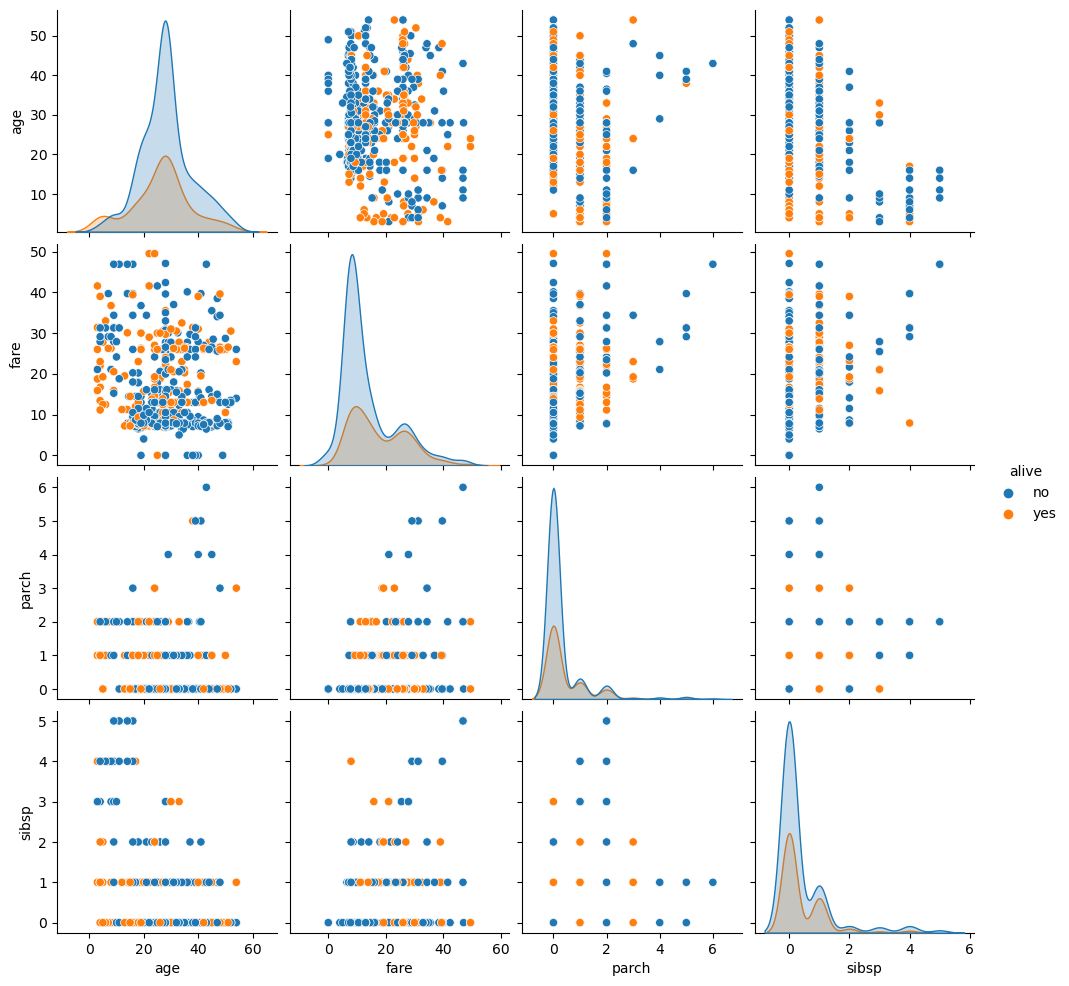

In [51]:
sns.pairplot(data=df[['age', 'fare', 'parch','sibsp','alive']],hue='alive')

## Descriptive analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

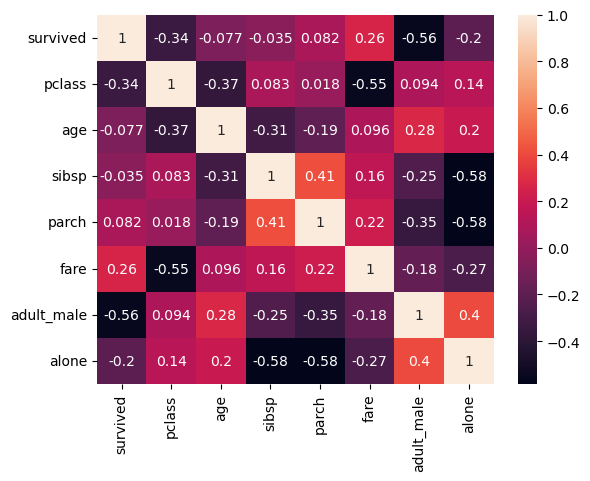

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.shape

(891, 15)

In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Handling my missing value

In [9]:
#deck has more than 60% missing hence we drop it
df=df.drop(columns=['deck'])

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
df['age'].fillna(df['age'].median(),inplace=True)

In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## Finding the outliers and replacing

##### Here there are 2 numerical columns(Age,Fare) here we remove the outliers from both of them

In [14]:
#Age
quantile_age=df.age.quantile(q=[0.75,0.25])
quantile_age

0.75    35.0
0.25    22.0
Name: age, dtype: float64

In [15]:
IQR=quantile_age.iloc[0]-quantile_age.iloc[1]
IQR

13.0

In [16]:
upper_extreme=quantile_age.iloc[0]+(1.5*IQR)
lower_extreme=quantile_age.iloc[1]-(1.5*IQR)

In [17]:
df = df[~((df['age'] <=lower_extreme) | (df['age'] >= upper_extreme))]

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

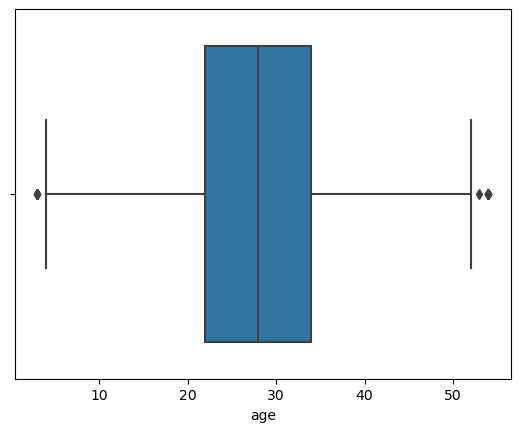

In [18]:
sns.boxplot(df.age)

In [19]:
#Fare
quantile_fare=df.fare.quantile(q=[0.75,0.25])
quantile_fare

0.75    30.0177
0.25     7.8958
Name: fare, dtype: float64

In [20]:
IQR_fare=quantile_fare.iloc[0]-quantile_fare.iloc[1]
IQR_fare

22.121899999999997

In [21]:
upper_extreme=quantile_fare.iloc[0]+(1.5*IQR)
lower_extreme=quantile_fare.iloc[1]-(1.5*IQR)

In [22]:
df = df[~((df['fare'] <=lower_extreme) | (df['fare'] >= upper_extreme))]

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

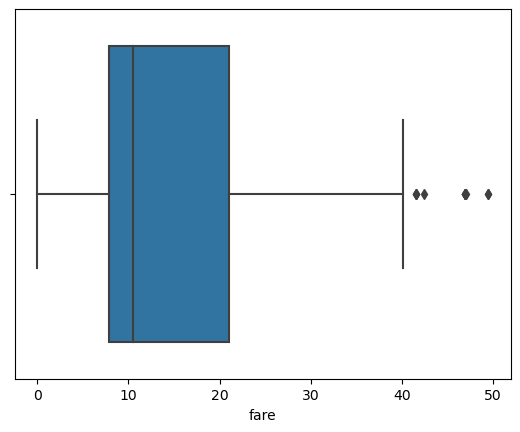

In [23]:
sns.boxplot(df.fare)

## Splitting the data into dependent and independent variables

In [24]:
y=df['survived']
x=df.drop(columns='survived',axis=1)

In [25]:
y

0      0
2      1
4      0
5      0
8      1
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 677, dtype: int64

In [76]:
x

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
4,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,3,male,28.0,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
8,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


## Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [35]:
x['sex']=le.fit_transform(x['sex'])
x['embarked']=le.fit_transform(x['embarked'])
x['class']=le.fit_transform(x['class'])
x['who']=le.fit_transform(x['who'])
x['adult_male']=le.fit_transform(x['adult_male'])
x['embark_town']=le.fit_transform(x['embark_town'])
x['alive']=le.fit_transform(x['alive'])
x['alone']=le.fit_transform(x['alone'])

## Scaling the independing data

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scale=MinMaxScaler()

In [38]:
scaled_x=pd.DataFrame(scale.fit_transform(x))

In [39]:
scaled_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,1.0,0.372549,0.2,0.000000,0.146452,1.0,1.0,0.5,1.0,1.0,0.0,0.0
1,1.0,0.0,0.450980,0.0,0.000000,0.160087,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,0.627451,0.0,0.000000,0.162612,1.0,1.0,0.5,1.0,1.0,0.0,1.0
3,1.0,1.0,0.490196,0.0,0.000000,0.170860,0.5,1.0,0.5,1.0,0.5,0.0,1.0
4,1.0,0.0,0.470588,0.0,0.333333,0.224896,1.0,1.0,1.0,0.0,1.0,1.0,0.0


## Splitting the data into training and testing

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.2,random_state=0)

In [42]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
354,0.5,1.0,0.882353,0.0,0.000000,0.262604,1.0,0.5,0.5,1.0,1.0,0.0,1.0
366,1.0,1.0,0.372549,0.0,0.000000,0.151922,1.0,1.0,0.5,1.0,1.0,0.0,1.0
671,1.0,0.0,0.705882,0.0,0.833333,0.588334,0.5,1.0,1.0,0.0,0.5,0.0,0.0
101,1.0,0.0,0.862745,0.2,0.000000,0.292904,1.0,1.0,1.0,0.0,1.0,0.0,0.0
454,1.0,1.0,0.490196,0.0,0.000000,0.145947,0.0,1.0,0.5,1.0,0.0,0.0,1.0


In [43]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
279,1.0,0.0,0.490196,0.0,0.000000,0.156552,0.5,1.0,1.0,0.0,0.5,1.0,1.0
144,0.5,0.0,0.568627,0.0,0.000000,0.262604,1.0,0.5,1.0,0.0,1.0,1.0,1.0
440,0.5,0.0,0.431373,0.2,0.166667,0.606009,1.0,0.5,1.0,0.0,1.0,1.0,0.0
390,0.0,1.0,0.862745,0.0,0.000000,0.687231,1.0,0.0,0.5,1.0,1.0,0.0,1.0
588,1.0,1.0,0.490196,0.0,0.000000,0.156300,0.5,1.0,0.5,1.0,0.5,0.0,1.0


In [44]:
y_train.head()

463    0
478    0
885    0
132    0
598    0
Name: survived, dtype: int64

In [45]:
y_test.head()

368    1
190    1
580    1
515    0
778    0
Name: survived, dtype: int64